In [1]:
%matplotlib inline

In [2]:
%config InlineBackend.figure_formats = {"png", "retina"}

In [3]:
def f1(x):
    return (x - 2) ** 2 + 2

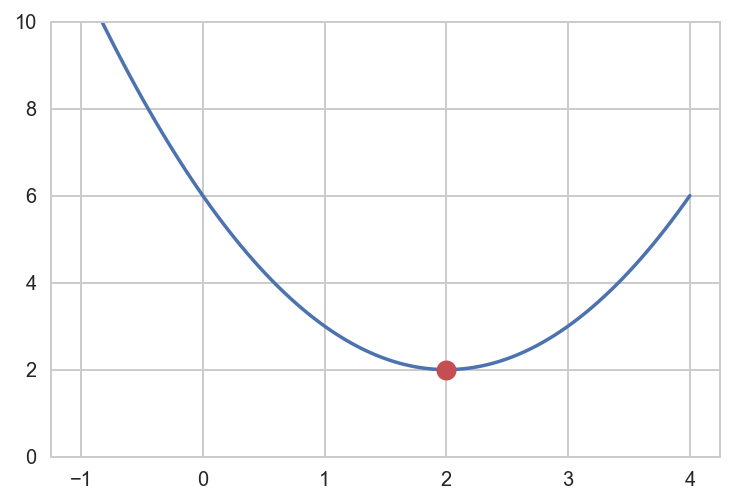

In [4]:
xx = np.linspace(-1,4,100)
plt.plot(xx, f1(xx))
plt.plot(2,2, 'ro', markersize=10)
plt.ylim(0,10)
plt.show()

In [5]:
def f2(x,y):
    return (1 - x)**2 + 100 * (y - x**2)**2

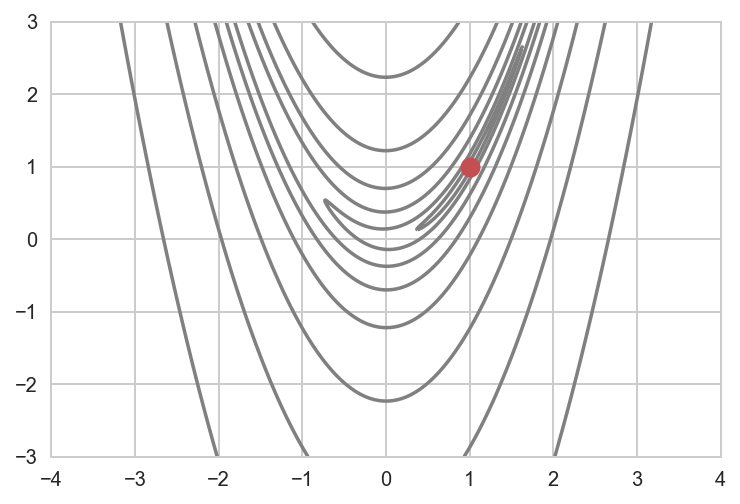

In [6]:
xx = np.linspace(-4, 4, 800)
yy = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X,Y)

plt.contour(X,Y,Z, colors="gray", levels=[0.4, 3, 15, 50, 150, 500, 1500, 5000])
plt.plot(1,1, 'ro', markersize=10)

plt.xlim(-4,4)
plt.ylim(-3,3)
plt.xticks(np.linspace(-4,4,9))
plt.yticks(np.linspace(-3,3,7))
plt.show()

In [7]:
def f1d(x):
    return 2 * (x - 2)

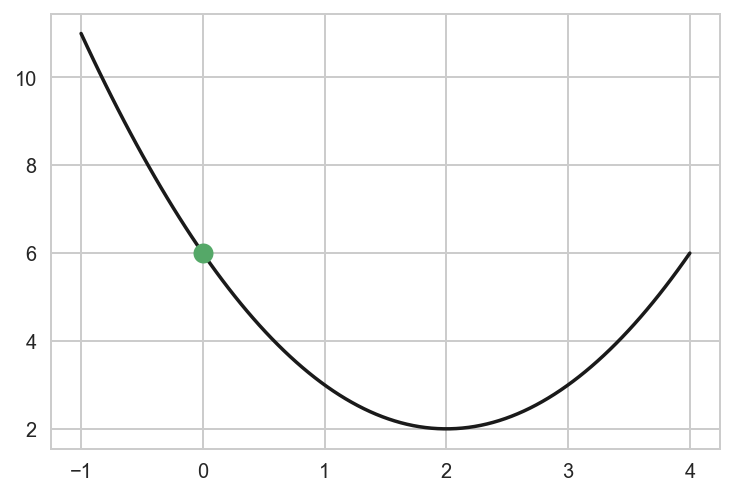

In [8]:
xx = np.linspace(-1, 4, 100)

plt.plot(xx, f1(xx), 'k-')

# step size
mu = 0.4

# k = 0
x = 0
plt.plot(x, f1(x), 'go', markersize=10)
# plt.plot(xx,f1d(x) * (xx - x) + f1(x), 'b--')

### 1차원 목적함수

x = 0, g = -4
x = 1.6, g = -0.7999999999999998
x = 1.92, g = -0.16000000000000014
x = 1.984, g = -0.03200000000000003
x = 1.9968, g = -0.006400000000000183


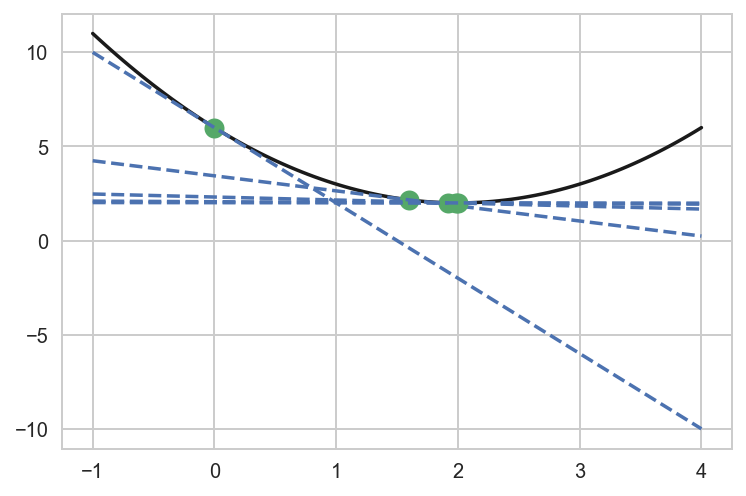

In [9]:
xx = np.linspace(-1, 4, 100)

plt.plot(xx, f1(xx), 'k-')

# step size
mu = 0.4

# k = 0 출발
x = 0
plt.plot(x, f1(x), 'go', markersize=10)
plt.plot(xx,f1d(x) * (xx - x) + f1(x), 'b--') # 접선의 방정식 : f(x) = f'(p)(x-p) + f(p)
print("x = {}, g = {}".format(x, f1d(x)))

# k = 1 첫 번째 이동 이동
x = x - mu*f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("x = {}, g = {}".format(x, f1d(x)))

# k = 2 두 번째 이동
x = x - mu*f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("x = {}, g = {}".format(x, f1d(x)))

# k = 3 세 번째 이동
x = x - mu*f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("x = {}, g = {}".format(x, f1d(x)))

# k = 4 네 번째 이동
x = x - mu*f1d(x)
plt.plot(x, f1(x), 'go', markersize=10)
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("x = {}, g = {}".format(x, f1d(x)))

### 2차원 목적함수

In [10]:
def f2g(x, y):
    """gradient of f2(x)"""
    return np.array((2.0 * (x - 1) - 400.0 * x * (y - x**2), 200.0 * (y - x**2)))

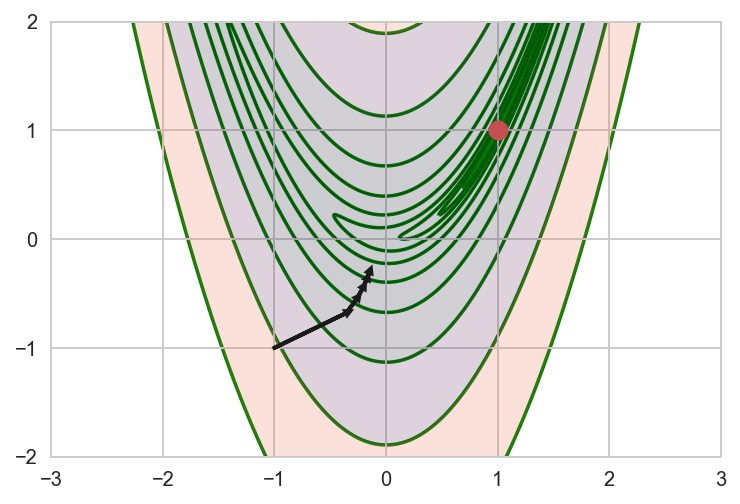

In [26]:
xx = np.linspace(-4,4, 800) # -4~4까지 800등분된걸 600개(yy) 만듬
yy = np.linspace(-3,3, 600) # -3~3까지 600등분된걸 열로 만들고 800개(xx) 만듬
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels = np.logspace(-1, 3, 10)

plt.contourf(X, Y, Z, alpha=0.2, levels=levels)
plt.contour(X,Y,Z, colors="green", levels=levels, zorder=0)
plt.plot(1,1,'ro',markersize=10)

mu = 8e-4
s = 0.95


x, y = -1, -1
for i in range(5):
    g = f2g(x,y)
    plt.arrow(x,y, -mu * g[0], -mu * g[1], head_width=0.04, head_length=0.04, \
              fc='k', ec='k', lw=2)
    x = x - mu*g[0]
    y = y - mu*g[1]
plt.xlim(0,3)
plt.ylim(0,2)
plt.xticks(np.linspace(-3,3,7)) # -3,-2,-1,0,1,2,3 : x축 7등분
plt.yticks(np.linspace(-2, 2, 5)) # -2,-1,0,1,2 : y축 5등분
plt.show()

### Scipy를 이용한 최적화

In [27]:
# jacobian, hessian function을 알아서 찾는 방법
x0 = 0
result = sp.optimize.minimize(f1, x0)
print(result)

      fun: 2.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([1.99999999])


In [42]:
# jacobian function을 넣는다면?
def f1p(x):
    return 2 * x - 4

result = sp.optimize.minimize(f1, x0, jac=f1p)
print(result)

      fun: 2.0
 hess_inv: array([[0.5]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 3
      nit: 2
     njev: 3
   status: 0
  success: True
        x: array([2.])


In [46]:
# 2차원에서 no jacobian
def f2(x):
    return (1 - x[0])**2 + 100 * (x[1] - x[0]**2)**2

x0 = (-2,2)
result = sp.optimize.minimize(f2, x0)
print(result)

      fun: 1.8096950583467382e-11
 hess_inv: array([[0.48099418, 0.95986354],
       [0.95986354, 1.92024898]])
      jac: array([-9.39709885e-06,  4.92575634e-06])
  message: 'Optimization terminated successfully.'
     nfev: 168
      nit: 35
     njev: 42
   status: 0
  success: True
        x: array([0.99999575, 0.99999152])


In [48]:
# 2차원에서 with jacobian
def f2g(x):
    """gradient of f2(x)"""
    return np.array((2.0 * (x[0] - 1) - 400.0 * x[0] * (x[1] - x[0]**2), 200.0 \
                     * (x[1] - x[0]**2)))

x0 = (-2,2)
result = sp.optimize.minimize(f2, x0, jac=f2g)
print(result)

      fun: 9.817296647123749e-14
 hess_inv: array([[0.48098005, 0.95985458],
       [0.95985458, 1.92027267]])
      jac: array([-8.75835534e-06,  4.59236316e-06])
  message: 'Optimization terminated successfully.'
     nfev: 42
      nit: 35
     njev: 42
   status: 0
  success: True
        x: array([1.00000021, 1.00000045])


### 2차 도함수 사용
- Conjugated Gradient method
- Broyden-Fletcher-Goldfarb-Shanno : BFGS method

In [49]:
def f3obj(x):
    return x[0] ** 2 + 1.5 * x[1] ** 2

In [60]:
result1 = sp.optimize.minimize(f3obj, (4, 1.6), method='CG', options={'maxiter' : 1})
x_cg_1 = result1['x']
x_cg_1

array([ 0.46753248, -0.51948049])

In [61]:
result2 = sp.optimize.minimize(f3obj, (4, 1.6), method='CG', options={'maxiter': 2})
x_cg_2 = result2['x']
x_cg_2

array([3.02235675e-08, 1.86777108e-08])

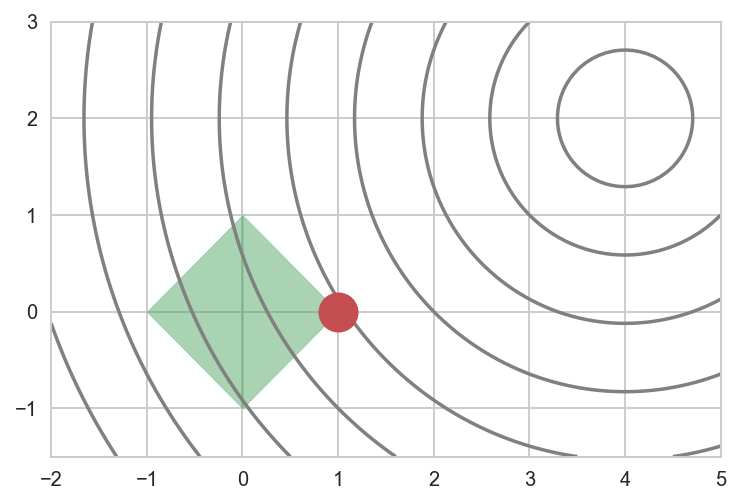

In [62]:
def f2plt(x1, x2):
    return np.sqrt((x1 - 4) ** 2 + (x2 - 2) ** 2)

x1 = np.linspace(-2, 5, 100)
x2 = np.linspace(-1.5, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Y = f2plt(X1, X2)

plt.contour(X1, X2, Y, colors="gray", levels=np.arange(0.5, 5, 0.5) * np.sqrt(2))

ax = plt.gca()
x12 = np.linspace(-1, 0, 10)
x13 = np.linspace(0, 1, 10)
ax.fill_between(x12, x12 + 1, -1 - x12, color='g', alpha=0.5)
ax.fill_between(x13, x13 - 1, 1 - x13, color='g', alpha=0.5)

plt.plot(1, 0, 'ro', ms=20)

plt.xlim(-2, 5)
plt.ylim(-1.5, 3)
plt.xticks(np.linspace(-2, 5, 8))
plt.yticks(np.linspace(-1, 3, 5))
plt.show()

In [73]:
def f2(x):
    return np.sqrt((x[0] - 4) ** 2 + (x[1] - 2) ** 2)

def ieq_constraint(x):
    return np.atleast_1d(3 - np.sum(np.abs(x)))

sp.optimize.fmin_slsqp(f2, np.array([0, 0]), ieqcons=[ieq_constraint])

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.1213203438762323
            Iterations: 6
            Function evaluations: 24
            Gradient evaluations: 6


array([2.4999741, 0.5000259])